**Классификация изображений:**

Cats vs Dogs

Обучить модель классификации изображение на 2 класса. Исходные данные и валидация решения на kaggle в рамках контеста Cats vs Dogs. Шаблон ipython-ноутбука для решения можно скачать по ссылке. Решения необходимо прислать в виде ipython-ноутбука с указанием значения метрики на Leaderboard. Задание засчитывается при значениях метрики Log Loss меньше 0.3.

[Датасет](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition)

#Загрузка и подготовка данных

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [ ]:
!unzip /content/drive/MyDrive/train.zip -d /content/

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: /content/train/dog.5499.jpg  
  inflating: /content/train/dog.55.jpg  
  inflating: /content/train/dog.550.jpg  
  inflating: /content/train/dog.5500.jpg  
  inflating: /content/train/dog.5501.jpg  
  inflating: /content/train/dog.5502.jpg  
  inflating: /content/train/dog.5503.jpg  
  inflating: /content/train/dog.5504.jpg  
  inflating: /content/train/dog.5505.jpg  
  inflating: /content/train/dog.5506.jpg  
  inflating: /content/train/dog.5507.jpg  
  inflating: /content/train/dog.5508.jpg  
  inflating: /content/train/dog.5509.jpg  
  inflating: /content/train/dog.551.jpg  
  inflating: /content/train/dog.5510.jpg  
  inflating: /content/train/dog.5511.jpg  
  inflating: /content/train/dog.5512.jpg  
  inflating: /content/train/dog.5513.jpg  
  inflating: /content/train/dog.5514.jpg  
  inflating: /content/train/dog.5515.jpg  
  inflating: /content/train/dog.5516.jpg  
  inflating: /content/train/dog.5

In [ ]:
!unzip /content/drive/MyDrive/test.zip -d /content/

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: /content/test/5499.jpg  
  inflating: /content/test/55.jpg    
  inflating: /content/test/550.jpg   
  inflating: /content/test/5500.jpg  
  inflating: /content/test/5501.jpg  
  inflating: /content/test/5502.jpg  
  inflating: /content/test/5503.jpg  
  inflating: /content/test/5504.jpg  
  inflating: /content/test/5505.jpg  
  inflating: /content/test/5506.jpg  
  inflating: /content/test/5507.jpg  
  inflating: /content/test/5508.jpg  
  inflating: /content/test/5509.jpg  
  inflating: /content/test/551.jpg   
  inflating: /content/test/5510.jpg  
  inflating: /content/test/5511.jpg  
  inflating: /content/test/5512.jpg  
  inflating: /content/test/5513.jpg  
  inflating: /content/test/5514.jpg  
  inflating: /content/test/5515.jpg  
  inflating: /content/test/5516.jpg  
  inflating: /content/test/5517.jpg  
  inflating: /content/test/5518.jpg  
  inflating: /content/test/5519.jpg  
  inflating: /conten

In [ ]:
# Установка пути к папкам с данными
train_dir = '/content/train'
test_dir = '/content/test'

In [ ]:
train_files = os.listdir(train_dir)

In [ ]:
# Создание списка путей к изображениям и списка меток классов
image_paths = []
labels = []

for file in train_files:
    if file.endswith('.jpg'):
        image_path = os.path.join(train_dir, file)
        image_paths.append(image_path)

        label = file.split('.')[0]  # Извлечение метки класса из имени файла
        labels.append(label)

In [ ]:
# Подготовка и аугментация данных
datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

In [ ]:
train_generator = datagen.flow_from_dataframe(dataframe=pd.DataFrame({'filename': image_paths, 'class': labels}),
                                                    x_col='filename',
                                                    y_col='class',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode='binary',
                                                    subset='training'
                                                    )

Found 20000 validated image filenames belonging to 2 classes.


In [ ]:
validation_generator  = datagen.flow_from_dataframe(dataframe=pd.DataFrame({'filename': image_paths, 'class': labels}),
                                                    x_col='filename',
                                                    y_col='class',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode='binary',
                                                    subset='validation'
                                                    )

Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
test_files = os.listdir(test_dir)

In [ ]:
test_image_paths = [os.path.join(test_dir, file) for file in test_files if file.endswith('.jpg')]

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
test_generator = test_datagen.flow_from_dataframe(dataframe=pd.DataFrame({'filename': test_image_paths}),
                                                  x_col='filename',
                                                  y_col=None,
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode=None,
                                                  shuffle=False)

Found 12500 validated image filenames.


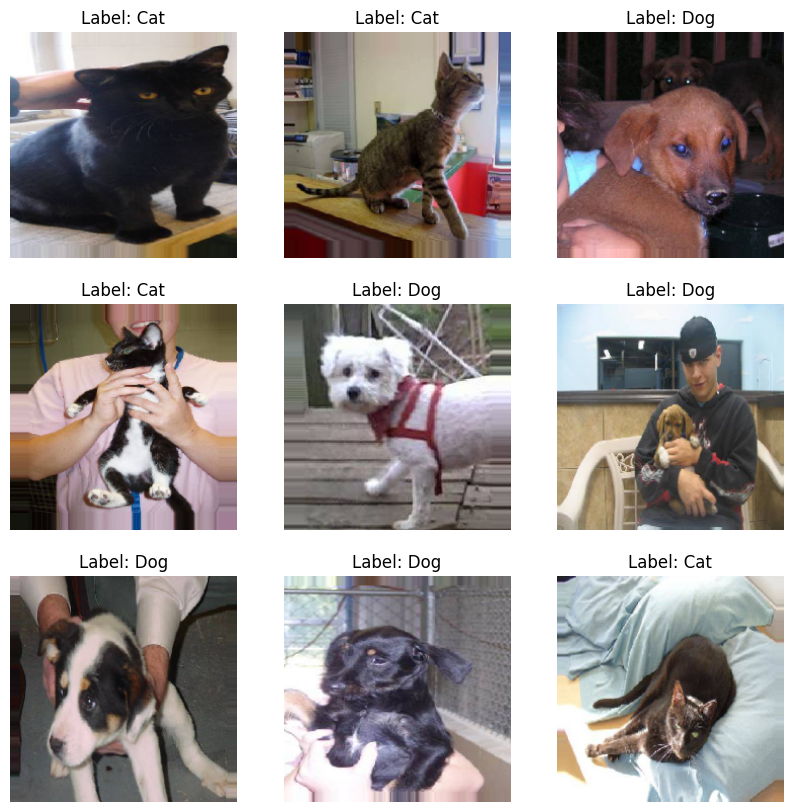

In [ ]:
# Получение нескольких образцов из обучающего набора данных
num_samples = 9
samples, labels = next(train_generator)

# Визуализация нескольких образцов
plt.figure(figsize=(10, 10))
for i in range(num_samples):
    plt.subplot(3, 3, i+1)
    image = samples[i]
    label = 'Dog' if labels[i] == 1 else 'Cat'
    plt.imshow(image)
    plt.title(f'Label: {label}')
    plt.axis('off')

plt.show()

# Обучение модели

## Сверточная нейронная сеть

Сверточная нейронная сеть (Convolutional Neural Network, CNN) является типом глубокой нейронной сети, который обычно используется для обработки и анализа изображений. Она успешно применяется во многих задачах компьютерного зрения, таких как классификация изображений, обнаружение объектов, семантическая сегментация и др. Вот подробное описание сверточной нейронной сети.

1. **Сверточные слои (Convolutional Layers):** Основным строительным блоком сверточной нейронной сети является сверточный слой. Каждый сверточный слой состоит из нескольких фильтров (ядер свертки), которые скользят по входному изображению с определенным шагом. Фильтры выполняют свертку с входным изображением и вычисляют активации, называемые картами признаков (feature maps). Карты признаков содержат информацию о различных локальных паттернах и текстурах в изображении.

2. **Функция активации (Activation Function):** После каждого сверточного слоя обычно применяется нелинейная функция активации, такая как ReLU (Rectified Linear Unit). Функция активации добавляет нелинейность в модель, позволяя ей изучать сложные и нелинейные зависимости в данных.

3. **Пулинговые слои (Pooling Layers):** После сверточных слоев обычно следуют пулинговые слои. Пулинг (pooling) позволяет уменьшить размер карты признаков и сжать информацию, сохраняя наиболее важные признаки. Наиболее распространенная операция пулинга - это операция субдискретизации (subsampling) или операция объединения (pooling), которая объединяет близлежащие значения в карте признаков в одно значение.

4. **Полносвязные слои (Fully Connected Layers):** После нескольких сверточных и пулинговых слоев в конце сети обычно следуют полносвязные слои. Полносвязные слои объединяют все активации предыдущего слоя в вектор и преобразуют их в выходные значения с помощью линейных операций и функций активации.

5. **Выходной слой (Output Layer):** В конце сети находится выходной слой, который обычно содержит один или несколько нейронов для предсказания соответствующих классов или регрессионных значений. В задаче классификации изображений с двумя классами, например, выходной слой содержит один нейрон с функцией активации, которая преобразует значение в диапазоне от 0 до 1 (обычно с помощью сигмоидной функции активации), указывая вероятность принадлежности к классу.

6. **Обучение и оптимизация:**
   - Обучение сверточной нейронной сети происходит с использованием алгоритма обратного распространения ошибки (Backpropagation), который настраивает веса и смещения сети на основе градиентов функции потерь.
   - Оптимизация происходит путем выбора оптимизационного алгоритма, такого как стохастический градиентный спуск (SGD), адам (Adam) и т. д., чтобы минимизировать функцию потерь и повысить точность модели на данных обучения.

7. **Dropout:** Во избежание переобучения (overfitting) сверточные нейронные сети могут использовать слои Dropout. Dropout временно и случайно отключает некоторые нейроны во время обучения, что помогает повысить обобщающую способность сети.

8. **Аугментация данных (Data Augmentation):** Важным аспектом обучения сверточных нейронных сетей является аугментация данных. Аугментация данных позволяет увеличить размер обучающего набора путем применения случайных преобразований к изображениям, таких как повороты, изменения масштаба, отражения и т. д. Это помогает сети обучаться более устойчивым к вариациям данных.

Сверточные нейронные сети - это мощный инструмент для обработки и анализа изображений. Они обычно состоят из нескольких сверточных слоев, пулинговых слоев, полносвязных слоев и выходного слоя. Оптимизация и обучение происходят с помощью обратного распространения ошибки, а дополнительные техники, такие как Dropout и аугментация данных, помогают улучшить обобщающую способность сети. Сверточные нейронные сети демонстрируют впечатляющие результаты во многих задачах компьютерного зрения и широко используются в различных областях и приложениях.


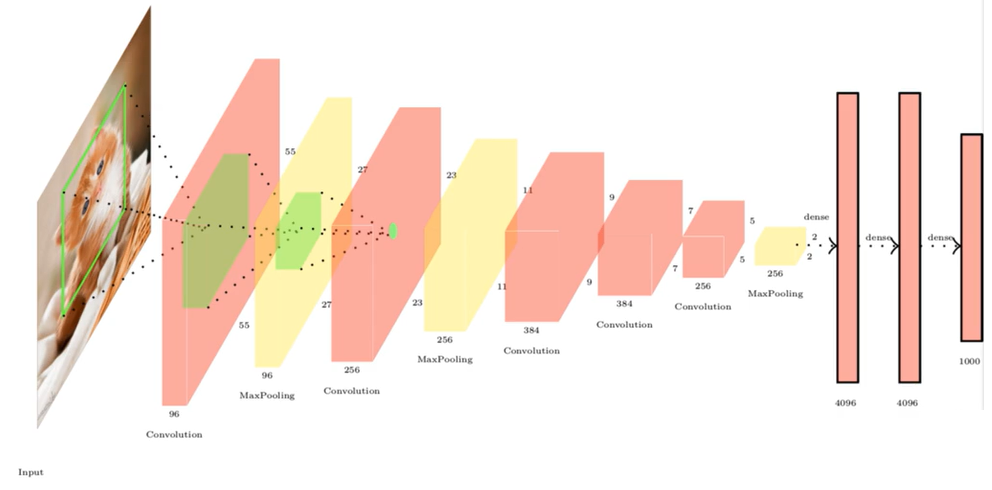

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# Создание модели сверточной нейронной сети
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
# Компиляция модели
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Обучение модели
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/20
625/625 [==============================] - 388s 608ms/step - loss: 1.2287 - accuracy: 0.5567 - val_loss: 0.6633 - val_accuracy: 0.5891
Epoch 2/20
625/625 [==============================] - 377s 603ms/step - loss: 0.6377 - accuracy: 0.6228 - val_loss: 0.6161 - val_accuracy: 0.6689
Epoch 3/20
625/625 [==============================] - 364s 583ms/step - loss: 0.5827 - accuracy: 0.6842 - val_loss: 0.7310 - val_accuracy: 0.6410
Epoch 4/20
625/625 [==============================] - 382s 612ms/step - loss: 0.4999 - accuracy: 0.7494 - val_loss: 0.5307 - val_accuracy: 0.7396
Epoch 5/20
625/625 [==============================] - 380s 608ms/step - loss: 0.4599 - accuracy: 0.7809 - val_loss: 0.5304 - val_accuracy: 0.7480
Epoch 6/20
625/625 [==============================] - 365s 585ms/step - loss: 0.4356 - accuracy: 0.7998 - val_loss: 0.6428 - val_accuracy: 0.6591
Epoch 7/20
625/625 [==============================] - 382s 611ms/step - loss: 0.4117 - accuracy: 0.8146 - val_loss: 0.6176 -

**Визуализация результатов обучения**

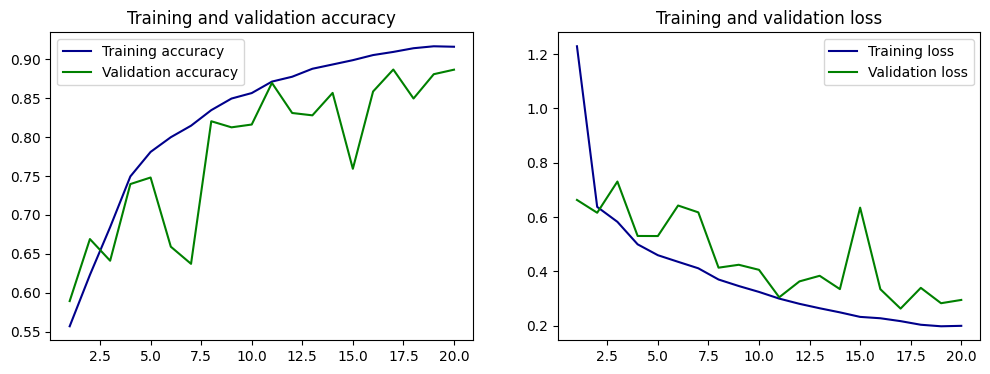

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training accuracy', color = 'darkblue')
plt.plot(epochs, val_acc, label='Validation accuracy', color = 'green')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training loss', color = 'darkblue')
plt.plot(epochs, val_loss, label='Validation loss', color = 'green')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
accuracy_cnn = history.history['accuracy'][-1]

In [ ]:
print(f'Final accuracy CNN - {round(accuracy_cnn,2)}')

Final accuracy CNN - 0.92


## AlexNet

AlexNet - это сверточная нейронная сеть, разработанная в 2012 году Алексеем Крижевским, Джоффри Хинтоном и Илейном Джарджи. Она стала одной из первых сверточных нейронных сетей, которая успешно применилась для классификации изображений в крупномасштабном датасете ImageNet, состоящем из более чем 1,4 миллиона изображений и 1000 классов.

Особенности AlexNet:

1. Архитектура: AlexNet представляет собой глубокую сверточную нейронную сеть, состоящую из восемнадцати слоев. Она имеет в основном сверточные и полносвязные слои.

2. Слои свертки: Сеть содержит пять сверточных слоев, которые выполняют операцию свертки на входных изображениях для извлечения характерных признаков изображения.

3. Слои объединения: После свертки используются три слоя объединения (max-pooling), чтобы уменьшить размерность данных и улучшить инвариантность к масштабированию и переносу объектов.

4. Функция активации: В качестве функции активации в AlexNet используется функция ReLU (Rectified Linear Unit) для обеспечения нелинейности и устранения проблемы затухания градиента.

5. Слой Dropout: В сети применяется слой Dropout для регуляризации и предотвращения переобучения. Dropout случайным образом отключает нейроны на этапе обучения с некоторой вероятностью.

6. Обучение на нескольких GPU: Впервые была успешно применена техника распределенного обучения на нескольких графических процессорах (GPU), что сильно ускорило обучение нейронной сети.

7. Softmax на выходном слое: В конце сети используется функция активации softmax на выходном слое для преобразования результата в вероятности принадлежности изображения к каждому классу.

Использование глубокой архитектуры, большого объема данных и инновационных техник обучения привело к значительному повышению точности классификации изображений и установило основу для последующих разработок сверточных нейронных сетей. AlexNet стала важным вехой в развитии глубокого обучения и привлекла большой интерес к исследованиям в области компьютерного зрения.


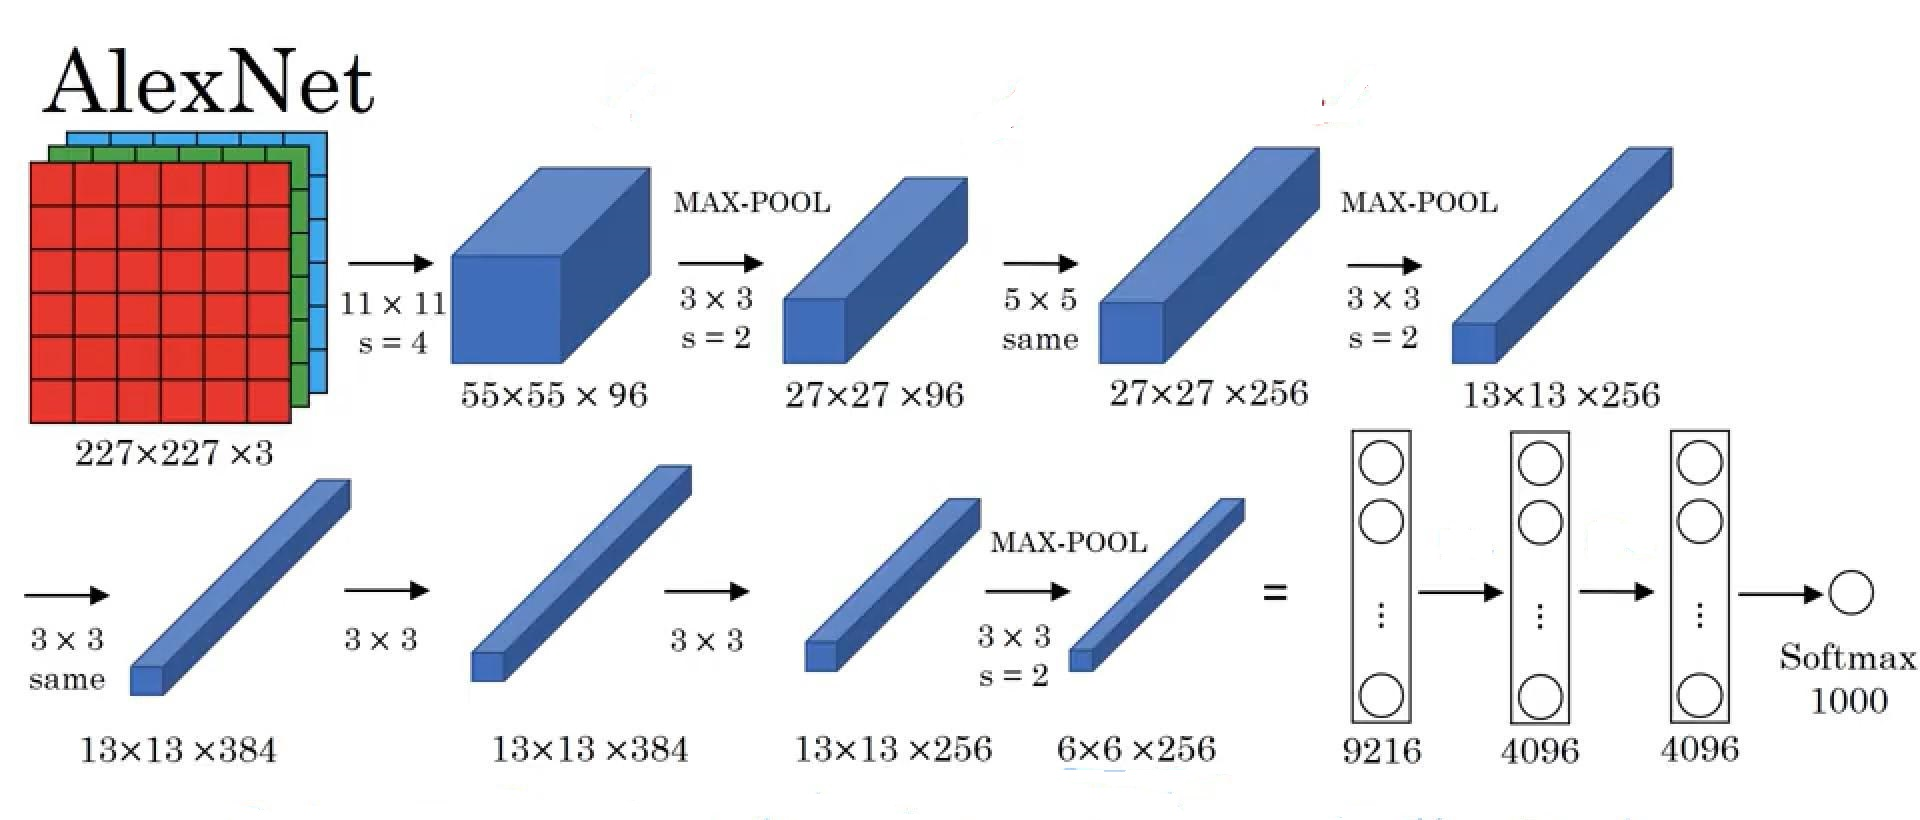

Используем архитектуру AlexNet, только изменим функцию активации на выходном слое, так как у нас задача бинарной классификации

In [ ]:
model_AlexNet = Sequential()

# 1st Convolutional Layer
model_AlexNet.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid', activation='relu'))
# Pooling
model_AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model_AlexNet.add(BatchNormalization())

# 2nd Convolutional Layer
model_AlexNet.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu'))

# Pooling
model_AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model_AlexNet.add(BatchNormalization())

# 3rd Convolutional Layer
model_AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))

# Batch Normalisation
model_AlexNet.add(BatchNormalization())

# 4th Convolutional Layer
model_AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))

# Batch Normalisation
model_AlexNet.add(BatchNormalization())

# 5th Convolutional Layer
model_AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
# Pooling
model_AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model_AlexNet.add(BatchNormalization())

# Passing it to a dense layer
model_AlexNet.add(Flatten())
# 1st Dense Layer
model_AlexNet.add(Dense(9216, input_shape=(224*224*3,), activation='relu'))

# Add Dropout to prevent overfitting
model_AlexNet.add(Dropout(0.4))
# Batch Normalisation
model_AlexNet.add(BatchNormalization())

# 2nd Dense Layer
model_AlexNet.add(Dense(4096, activation='relu'))

# Add Dropout
model_AlexNet.add(Dropout(0.4))
# Batch Normalisation
model_AlexNet.add(BatchNormalization())

# 3rd Dense Layer
model_AlexNet.add(Dense(4096, activation='relu'))

# Add Dropout
model_AlexNet.add(Dropout(0.4))
# Batch Normalisation
model_AlexNet.add(BatchNormalization())

# Output Layer
model_AlexNet.add(Dense(1, activation='sigmoid'))

In [ ]:
model_AlexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                                                        

In [ ]:
# Компиляция модели
model_AlexNet.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_AlexNet = model_AlexNet.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/20
625/625 [==============================] - 391s 599ms/step - loss: 0.8487 - accuracy: 0.5586 - val_loss: 1.1913 - val_accuracy: 0.5519
Epoch 2/20
625/625 [==============================] - 340s 544ms/step - loss: 0.7157 - accuracy: 0.5868 - val_loss: 0.6843 - val_accuracy: 0.5911
Epoch 3/20
625/625 [==============================] - 358s 573ms/step - loss: 0.6846 - accuracy: 0.6213 - val_loss: 0.7571 - val_accuracy: 0.5944
Epoch 4/20
625/625 [==============================] - 338s 541ms/step - loss: 0.6585 - accuracy: 0.6522 - val_loss: 1.1377 - val_accuracy: 0.5879
Epoch 5/20
625/625 [==============================] - 356s 570ms/step - loss: 0.6228 - accuracy: 0.6840 - val_loss: 0.6152 - val_accuracy: 0.6653
Epoch 6/20
625/625 [==============================] - 360s 576ms/step - loss: 0.5610 - accuracy: 0.7251 - val_loss: 0.5037 - val_accuracy: 0.7522
Epoch 7/20
625/625 [==============================] - 360s 577ms/step - loss: 0.5245 - accuracy: 0.7479 - val_loss: 0.4912 -

**Визуализация результатов обучения AlexNet**

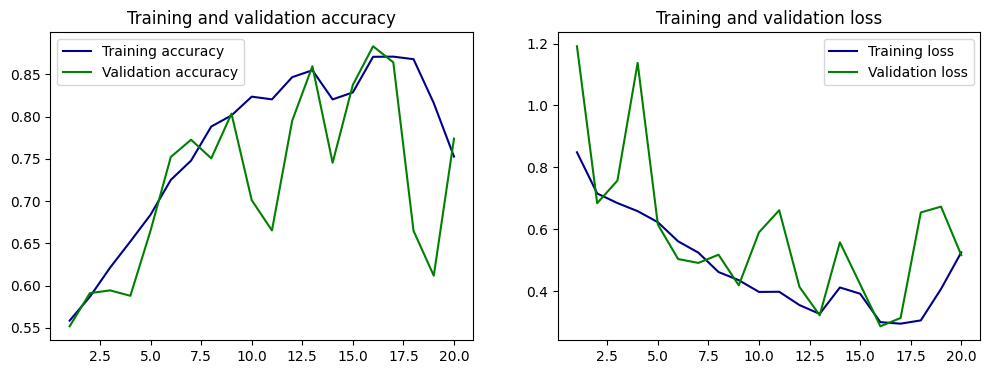

In [ ]:
acc = history_AlexNet.history['accuracy']
val_acc = history_AlexNet.history['val_accuracy']
loss = history_AlexNet.history['loss']
val_loss = history_AlexNet.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training accuracy', color = 'darkblue')
plt.plot(epochs, val_acc, label='Validation accuracy', color = 'green')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training loss', color = 'darkblue')
plt.plot(epochs, val_loss, label='Validation loss', color = 'green')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
accuracy_AlexNet = history_AlexNet.history['accuracy'][-1]
print(f'Final accuracy AlexNet - {round(accuracy_AlexNet,2)}')

Final accuracy AlexNet - 0.75


##VGG-16

VGG-16 (Visual Geometry Group 16) - это сверточная нейронная сеть, предложенная в 2014 году исследовательской группой Visual Geometry Group из Оксфордского университета. Она была разработана для классификации изображений в датасете ImageNet, который состоит из более чем 1,4 миллиона изображений и 1000 классов.

Особенности VGG-16:


* Сверточные слои = 13

* Слои объединения = 5

* Плотные слои = 3

Давайте подробно рассмотрим слои:

1. Вход: изображение размеров (224, 224, 3).

2. Convolution Layer Conv1:Conv1-1: 64 фильтраConv1-2: 64 фильтра и максимальное объединениеРазмеры изображения: (224, 224)

3. Conv1-1: 64 фильтра

4. Conv1-2: 64 фильтра и максимальное объединение

5. Размеры изображения: (224, 224)

6. Слой свертки Conv2: теперь мы увеличиваем фильтры до 128Размеры входного изображения: (112 112)Conv2-1: 128 фильтровConv2-2: 128 фильтров и максимальное объединение

7. Размеры входного изображения: (112 112)

8. Conv2-1: 128 фильтров

9. Conv2-2: 128 фильтров и максимальное объединение

10. Convolution Layer Conv3: снова удвойте фильтры до 256, а теперь добавьте еще один слой свертки.Размеры входного изображения: (56,56)Conv3-1: 256 фильтровConv3-2: 256 фильтровУсловие 3-3: 256 фильтров и максимальное объединение

11. Размеры входного изображения: (56,56)

12. Conv3-1: 256 фильтров

13. Conv3-2: 256 фильтров

14. Условие 3-3: 256 фильтров и максимальное объединение

15. Convolution Layer Conv4: аналогично Conv3, но теперь с 512 фильтрами.Размеры входного изображения: (28, 28)Conv4-1: 512 фильтровConv4-2: 512 фильтровConv4-3: 512 фильтров и максимальное объединение

16. Размеры входного изображения: (28, 28)

17. Conv4-1: 512 фильтров

18. Conv4-2: 512 фильтров

19. Conv4-3: 512 фильтров и максимальное объединение

20. Convolution Layer Conv5: то же, что Conv4Размеры входного изображения: (14, 14)Conv5-1: 512 фильтровConv5-2: 512 фильтровConv5-3: 512 фильтров и максимальное объединениеВыходные размеры здесь (7, 7). На этом этапе мы сглаживаем выходные данные этого слоя, чтобы создать вектор признаков.

21. Размеры входного изображения: (14, 14)

22. Conv5-1: 512 фильтров

23. Conv5-2: 512 фильтров

24. Conv5-3: 512 фильтров и максимальное объединение

25. Выходные размеры здесь (7, 7). На этом этапе мы сглаживаем выходные данные этого слоя, чтобы создать вектор признаков.

26. Полностью подключенный / плотный FC1 : 4096 узлов, генерирующих вектор признаков размера (1, 4096)

27. Fully ConnectedDense FC2: 4096 узлов, генерирующих вектор признаков размера (1, 4096)

28. Полностью подключенный / плотный FC3: 4096 узлов, генерирующих 1000 каналов для 1000 классов. Затем он передается в функцию активации Softmax.

29. Выходной слой

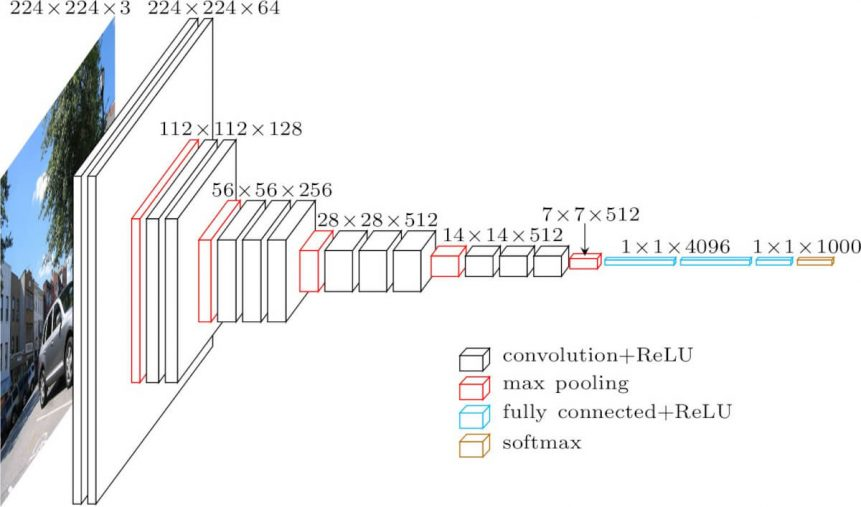

Вот более интуитивно понятная компоновка модели VGG-16.

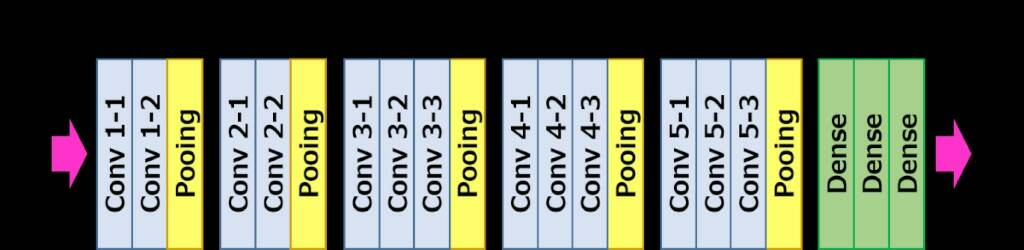

Использовать будем предобученную модель VGG-16 и запустим обучение на 10 эпох

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.optimizers import RMSprop

Загрузка модели VGG-16

In [ ]:
base_model_vgg16 = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

58889256/58889256 [==============================] - 0s 0us/step


не нужно обучать все слои, поэтому делаем их non_trainable

In [ ]:
for layer in base_model_vgg16.layers:
    layer.trainable = False

Строим последний полносвязанный слой

In [ ]:
# Flatten the output layer to 1 dimension
x_vgg16 = Flatten()(base_model_vgg16.output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x_vgg16 = Dense(512, activation='relu')(x_vgg16)
# Add a dropout rate of 0.5
x_vgg16 = Dropout(0.5)(x_vgg16)
# Add a final sigmoid layer for classification
x_vgg16 = Dense(1, activation='sigmoid')(x_vgg16)

In [ ]:
model_vgg16 = Model(base_model_vgg16.input, x_vgg16)

In [ ]:
model_vgg16.compile(optimizer = RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model_vgg16.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
history_vgg16 = model_vgg16.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/10
625/625 [==============================] - 400s 631ms/step - loss: 0.3435 - acc: 0.8505 - val_loss: 0.2717 - val_acc: 0.8830
Epoch 2/10
625/625 [==============================] - 375s 601ms/step - loss: 0.2408 - acc: 0.8988 - val_loss: 0.2128 - val_acc: 0.9071
Epoch 3/10
625/625 [==============================] - 378s 604ms/step - loss: 0.2234 - acc: 0.9111 - val_loss: 0.1971 - val_acc: 0.9211
Epoch 4/10
625/625 [==============================] - 377s 603ms/step - loss: 0.2056 - acc: 0.9186 - val_loss: 0.1932 - val_acc: 0.9207
Epoch 5/10
625/625 [==============================] - 380s 607ms/step - loss: 0.1978 - acc: 0.9220 - val_loss: 0.1843 - val_acc: 0.9263
Epoch 6/10
625/625 [==============================] - 378s 605ms/step - loss: 0.1852 - acc: 0.9247 - val_loss: 0.2043 - val_acc: 0.9217
Epoch 7/10
625/625 [==============================] - 365s 584ms/step - loss: 0.1832 - acc: 0.9294 - val_loss: 0.1866 - val_acc: 0.9253
Epoch 8/10
625/625 [============================

In [ ]:
model_vgg16.save('/content/drive/MyDrive/cats-dogs-vgg16.hdf5')

##Inception V3

Inception V3 - это глубокая сверточная нейронная сеть, которая применяет Inception-блоки для извлечения признаков из изображений. Основной идеей архитектуры Inception V3 является использование сверток разных размеров ядер (1x1, 3x3, 5x5) и слоев объединения (max-pooling) в одном блоке. Это позволяет сети эффективно извлекать признаки из изображений разных масштабов и размеров.

Давайте рассмотрим основные шаги, которые происходят в Inception V3:

1. Входное изображение: На входе Inception V3 принимает изображение. Если изображение имеет высоту и ширину, отличные от 299 пикселей, оно автоматически масштабируется до размера 299x299 пикселей.

2. Сверточные слои: Первый блок сети состоит из нескольких сверточных слоев и слоев объединения (max-pooling), которые уменьшают размер изображения и помогают извлечь базовые признаки.

3. Inception-блоки: Основная часть Inception V3 состоит из нескольких Inception-блоков. Каждый Inception-блок принимает на вход выходные данные из предыдущего блока и выполняет несколько сверток с различными размерами ядер (1x1, 3x3, 5x5) и слоев объединения. Затем результаты этих сверток объединяются в один тензор, который передается следующему Inception-блоку или полносвязным слоям для классификации.

4. Полносвязные слои: В конце Inception V3 располагаются несколько полносвязных слоев, которые преобразуют выходы Inception-блоков в вероятности принадлежности изображения к каждому классу. Как правило, в модели Inception V3 используется softmax для получения вероятностей.

5. Выход: Выходной слой модели Inception V3 представляет собой вероятности принадлежности изображения к каждому классу.

Inception V3 обучается с использованием метода обратного распространения ошибки (backpropagation) и оптимизации, такой как стохастический градиентный спуск (SGD) или адаптивный момент (Adam). Во время обучения сети, веса сверточных слоев и полносвязных слоев настраиваются таким образом, чтобы минимизировать ошибку классификации и повысить точность модели.

Inception V3 стала одной из самых популярных моделей в области компьютерного зрения и применяется в различных задачах, таких как классификация изображений, детектирование объектов и семантическая сегментация. Её эффективная архитектура и способность выделять признаки изображений разного масштаба сделали её мощным инструментом для решения сложных задач обработки изображений.



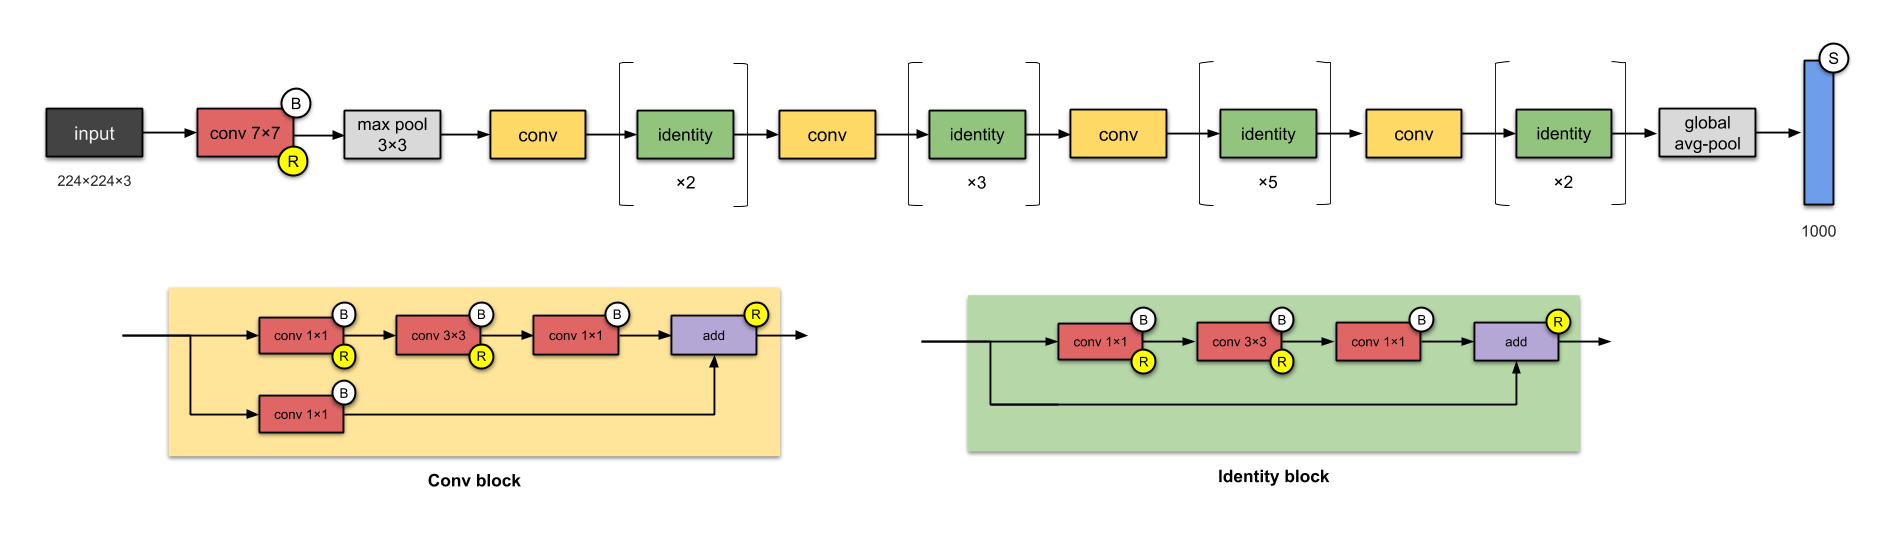

In [ ]:
from keras.applications.inception_v3 import InceptionV3

In [ ]:
base_model_InceptionV3 = InceptionV3(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model_InceptionV3.layers:
    layer.trainable = False

In [ ]:
x_invV3 = Flatten()(base_model_InceptionV3.output)
x_invV3 = Dense(1024, activation='relu')(x_invV3)
x_invV3 = Dropout(0.2)(x_invV3)
x_invV3 = Dense(1, activation='sigmoid')(x_invV3)

In [ ]:
model_InceptionV3 = Model(base_model_InceptionV3.input, x_invV3)

In [ ]:
model_InceptionV3.compile(optimizer = RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model_InceptionV3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
history_InceptionV3 = model_InceptionV3.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/10
625/625 [==============================] - 398s 613ms/step - loss: 0.2962 - acc: 0.9696 - val_loss: 0.3287 - val_acc: 0.9722
Epoch 2/10
625/625 [==============================] - 379s 606ms/step - loss: 0.1781 - acc: 0.9804 - val_loss: 0.1784 - val_acc: 0.9782
Epoch 3/10
625/625 [==============================] - 381s 610ms/step - loss: 0.1402 - acc: 0.9826 - val_loss: 0.1192 - val_acc: 0.9840
Epoch 4/10
625/625 [==============================] - 382s 612ms/step - loss: 0.1287 - acc: 0.9843 - val_loss: 0.1373 - val_acc: 0.9802
Epoch 5/10
625/625 [==============================] - 389s 623ms/step - loss: 0.1094 - acc: 0.9860 - val_loss: 0.2494 - val_acc: 0.9764
Epoch 6/10
625/625 [==============================] - 379s 605ms/step - loss: 0.0894 - acc: 0.9873 - val_loss: 0.2761 - val_acc: 0.9657
Epoch 7/10
625/625 [==============================] - 381s 609ms/step - loss: 0.0839 - acc: 0.9884 - val_loss: 0.1260 - val_acc: 0.9830
Epoch 8/10
625/625 [============================

In [ ]:
model_InceptionV3.save('/content/drive/MyDrive/cats-dogs-InceptionV3.hdf5')

##ResNet50

ResNet50 (Residual Network 50) - это глубокая сверточная нейронная сеть, представленная в 2015 году в статье "Deep Residual Learning for Image Recognition" командой Microsoft Research. Эта модель является одной из наиболее известных архитектур глубокого обучения и применяется для классификации изображений, обнаружения объектов и других задач компьютерного зрения.

Особенности модели ResNet50:

1. Глубокая архитектура: ResNet50 имеет глубокую архитектуру, состоящую из 50 слоев свертки и объединения. Это позволяет сети выучивать сложные и абстрактные признаки из изображений.

2. Остаточные блоки (Residual Blocks): Основной идеей ResNet50 являются остаточные блоки, которые предназначены для решения проблемы затухающего градиента при обучении глубоких нейронных сетей. Вместо того чтобы пытаться научить сеть выучивать функцию F(x), остаточные блоки вычисляют "остаточную" функцию F(x) - x, что позволяет переопределить градиенты и упростить обучение.

3. Пропуск соединений (Shortcut Connections): Остаточные блоки имеют "пропуск соединения", который добавляет входные данные (x) к выходным данным (F(x)) слоя. Это делает обучение более стабильным и позволяет глубоким сетям успешно обучаться без значительного ухудшения точности.

4. Свертки 1x1: В ResNet50 применяются свертки 1x1 для сокращения размерности и уменьшения числа параметров в сети. Свертки 1x1 выполняют линейные комбинации признаков и помогают уменьшить вычислительную сложность модели.

5. Свертки 3x3 и 5x5: ResNet50 также использует свертки 3x3 и 5x5 для извлечения признаков из изображений разных масштабов.

Принцип работы ResNet50:

Процесс работы ResNet50 основан на передаче информации через остаточные блоки с пропусками соединений. Когда данные проходят через каждый остаточный блок, они могут пройти два пути: через сверточные слои и через пропуск соединение, где добавляются к исходным данным. Это позволяет передавать информацию и градиенты без затухания и предотвращает возникновение проблемы градиентного затухания при обучении глубоких сетей.

Когда модель ResNet50 обучается, веса сверточных слоев и остаточных блоков настраиваются таким образом, чтобы минимизировать ошибку классификации на обучающих данных. После обучения модель может быть использована для классификации изображений или других задач компьютерного зрения, предсказывая принадлежность изображения к различным классам или детектируя объекты на изображении.

Благодаря применению остаточных блоков и пропускам соединений, ResNet50 стала одной из наиболее эффективных архитектур глубокого обучения, способной обучаться глубоким моделям с высокой точностью и стабильностью.


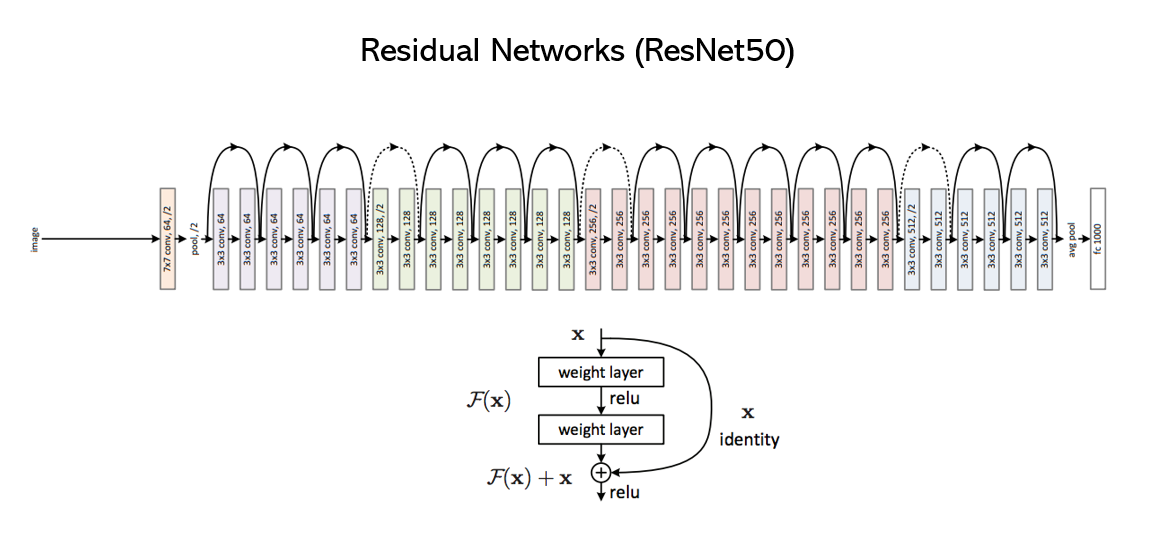

In [ ]:
from keras.applications import ResNet50

In [ ]:
base_model_resnet50 = ResNet50(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
for layer in base_model_resnet50.layers:
    layer.trainable = False

In [ ]:
x_resnet50 = Flatten()(base_model_resnet50.output)
x_resnet50 = Dense(1024, activation='relu')(x_resnet50)
x_resnet50 = Dropout(0.2)(x_resnet50)
x_resnet50 = Dense(1, activation='sigmoid')(x_resnet50)

In [ ]:
model_resnet50 = Model(base_model_resnet50.input, x_resnet50)

In [ ]:
model_resnet50.compile(optimizer = RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model_resnet50.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
history_resnet50 = model_resnet50.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/10
625/625 [==============================] - 411s 636ms/step - loss: 0.8316 - acc: 0.5631 - val_loss: 0.7306 - val_acc: 0.5467
Epoch 2/10
625/625 [==============================] - 392s 627ms/step - loss: 0.6637 - acc: 0.6050 - val_loss: 0.7377 - val_acc: 0.5232
Epoch 3/10
625/625 [==============================] - 390s 624ms/step - loss: 0.6448 - acc: 0.6277 - val_loss: 0.6336 - val_acc: 0.6364
Epoch 4/10
625/625 [==============================] - 386s 618ms/step - loss: 0.6351 - acc: 0.6459 - val_loss: 0.6179 - val_acc: 0.6621
Epoch 5/10
625/625 [==============================] - 390s 623ms/step - loss: 0.6265 - acc: 0.6507 - val_loss: 0.6100 - val_acc: 0.6761
Epoch 6/10
625/625 [==============================] - 392s 626ms/step - loss: 0.6163 - acc: 0.6586 - val_loss: 0.6132 - val_acc: 0.6713
Epoch 7/10
625/625 [==============================] - 390s 624ms/step - loss: 0.6069 - acc: 0.6689 - val_loss: 0.5900 - val_acc: 0.6871
Epoch 8/10
625/625 [============================

#Заключение

Создадим датафрейм содержащий скор последний эпохи по тренировочной  и валидационной выборке каждой модели

In [ ]:
res = pd.DataFrame({'Model': ['CNN', 'AlexNet', 'VGG-16', 'Inception V3', 'ResNet50' ],
                    'Train accuracy': [0.9161, 0.7527, 0.9329, 0.9903, 0.6924],
                    'Validation accuracy': [0.8866, 0.7738, 0.9850, 0.9824, 0.6843]})

In [ ]:
res.sort_values('Validation accuracy', ascending= False)

,Model,Train accuracy,Validation accuracy
2,VGG-16,0.9329,0.9850
3,Inception V3,0.9903,0.9824
0,CNN,0.9161,0.8866
1,AlexNet,0.7527,0.7738
4,ResNet50,0.6924,0.6843


Лучший результат во аремя обучения у модели Inception V3, для предсказания, на тестовой выборке, будем использовать ее.

In [ ]:
import cv2

In [ ]:
pred = model_InceptionV3.predict(test_generator)

391/391 [==============================] - 92s 230ms/step


In [ ]:
preds_clipped = np.clip(pred, 0.01, 0.99)

In [ ]:
test_label = []
a = os.listdir("test/")
for i in range(len(a)):
    test_label.append(a[i].split(".")[0])
test_label[0:5]

['7289', '9795', '8122', '7214', '12122']

In [ ]:
dic = dict(zip([int(i) for i in test_label], preds_clipped))

In [ ]:
dic = dict(sorted(dic.items()))

In [ ]:
df = pd.DataFrame.from_dict(dic, orient='index', columns=['label'])
df.index.name = 'id'
df.head()

,label
id,
1,0.99
2,0.99
3,0.99
4,0.99
5,0.01


In [ ]:
df.to_csv("submission_2.csv")

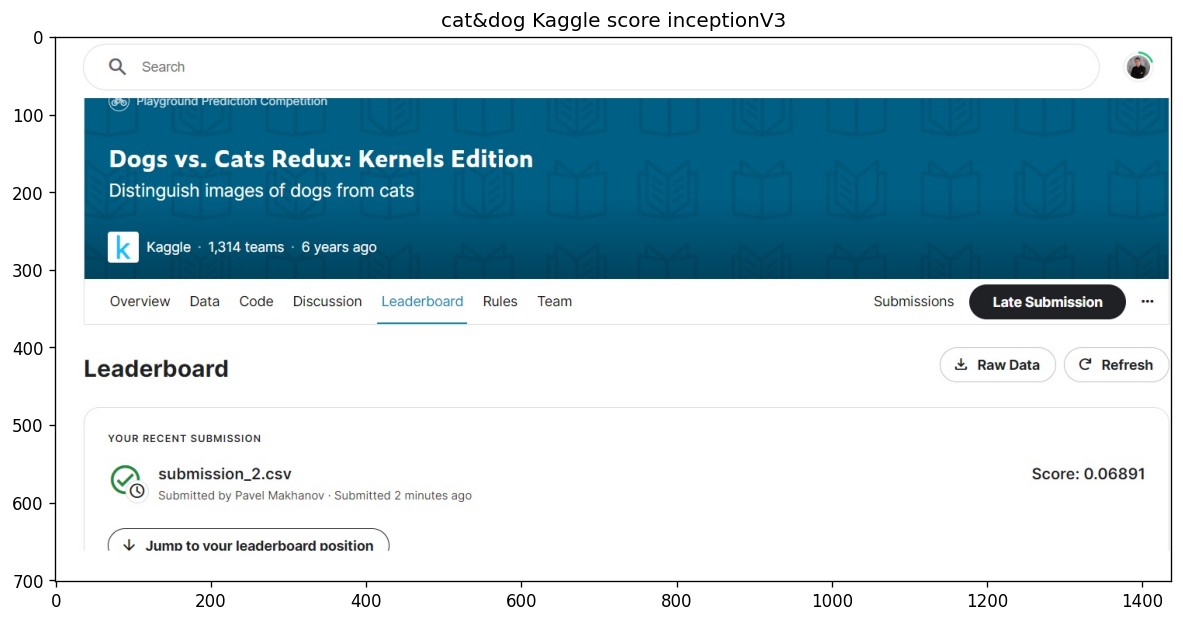

In [ ]:
catdog_Submit = cv2.imread('liderboard.jpg')
plt.figure(figsize= (12,12), dpi= 120)
plt.imshow(cv2.cvtColor(catdog_Submit, cv2.COLOR_BGR2RGB))
plt.title('cat&dog Kaggle score inceptionV3')
plt.show()